#Práctica Deep Learning: Elena Peris Mercé

## Cargando la data

In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid


# Direct link

# https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-cp37-none-any.whl size=2657 sha256=4f4d321d4f99dd7b7ce4f2a8d4553c94bed6819ada2c9f2fe80cfe6e7e0cb065
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras.utils


In [ ]:
# Descargamos el dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2021-06-28 19:36:25--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [    <=>             ]  54.19M  2.80MB/s    in 20s     

2021-06-28 19:36:47 (2.72 MB/s) - ‘airbnb-listings.csv’ saved [56825724]



In [ ]:
# comprobamos que es lo que nos hemos descargado
!ls -ll

total 55500
-rw-r--r-- 1 root root 56825724 Jun 28 19:36 airbnb-listings.csv
drwxr-xr-x 1 root root     4096 Jun 15 13:37 sample_data


In [ ]:
# Leemos el dataset usando pandas y vemos las primeras filas
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';',decimal='.')
data.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/40713802/3...,11902716,https://www.airbnb.com/users/show/11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Aficionados al cine, la música, los amigos, el...",within a day,100.0,NaN,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...,Palacio,1.0,1.0,"email,phone,reviews,jumio","Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.410106,-3.714754,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",NaN,36.0,NaN,NaN,NaN,NaN,1,0,2,1125,4 days ago,NaN,1,1,1,1,2017-04-07,80,2014-06-15,2017-04-01,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.4101060805,-3.71475403418","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/44239584/c...,809083,https://www.airbnb.com/users/show/809083,Michael,2011-07-12,"Madrid, Madrid, Spain",I'm a US expat who enjoys welcoming people fro...,within a day,94.0,NaN,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/profil...,Palacio,3.0,3.0,"email,phone,facebook,reviews,jumio,work_email","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.416969,-3.7094

In [ ]:
data.shape

(14001, 89)

In [ ]:
# nombre de las variables para poder manipular mejor las columnas
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## Limpieza de los datos

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/40713802/3...,11902716,https://www.airbnb.com/users/show/11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Aficionados al cine, la música, los amigos, el...",within a day,100.0,NaN,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...,Palacio,1.0,1.0,"email,phone,reviews,jumio","Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.410106,-3.714754,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",NaN,36.0,NaN,NaN,NaN,NaN,1,0,2,1125,4 days ago,NaN,1,1,1,1,2017-04-07,80,2014-06-15,2017-04-01,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.4101060805,-3.71475403418","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/44239584/c...,809083,https://www.airbnb.com/users/show/809083,Michael,2011-07-12,"Madrid, Madrid, Spain",I'm a US expat who enjoys welcoming people fro...,within a day,94.0,NaN,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/profil...,Palacio,3.0,3.0,"email,phone,facebook,reviews,jumio,work_email","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.416969,-3.7094

In [ ]:
data_clean = data

In [ ]:
from datetime import datetime

irrelevant_columns = ['ID','Listing Url','Scrape ID','Last Scraped','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Calendar Updated','Calendar last Scraped','First Review','Last Review','Geolocation','Calculated host listings count', 'Host Response Time']

relevants_but_droppable_columns = ['Name', 'Summary', 'Space', 'Description','Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules','Host Location', 'Host About']

columnas_mas30_NaN = ['Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']

data_clean.drop(irrelevant_columns, axis=1, inplace=True)
data_clean.drop(relevants_but_droppable_columns, axis=1, inplace=True)
data_clean.drop(columnas_mas30_NaN, axis=1, inplace=True)

data_clean.drop(['Experiences Offered'], axis=1, inplace=True)
data_clean.drop(['Street'], axis=1, inplace=True)
data_clean.drop(['City', 'State', 'Market', 'Country', 'Country Code'], axis=1, inplace=True)

reviews = data_clean.loc[: , "Review Scores Rating":"Review Scores Value"]
data_clean['Average Review'] = reviews.mean(axis=1)

data_clean.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month'
        ], axis=1, inplace=True)

data_clean.drop(['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'
         ,'Zipcode','Smart Location'
        ], axis=1, inplace=True)

data_clean = data_clean[data_clean['Price'] <= 200]
data_clean = data_clean[data_clean['Bathrooms'] <= 5]
data_clean = data_clean[data_clean['Bedrooms'] <= 6]
data_clean = data_clean[data_clean['Extra People'] <= 50]

data_clean['Features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
data_clean['Amenities'].fillna("", inplace=True)
data_clean['Host Verifications'].fillna("", inplace=True)

data_clean['Features'] = data_clean['Features'].apply(lambda x: len(str(x).split(',')))
data_clean['Amenities'] = data_clean['Amenities'].apply(lambda x: len(str(x).split(',')))
data_clean['Host Verifications'] = data_clean['Host Verifications'].apply(lambda x: len(str(x).split(',')))

data_clean.dropna(subset=['Host Since'], inplace=True)
data_clean['Host Since'] = data_clean['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
data_clean['Years Being Host'] = data_clean['Host Since'].apply(lambda x: 2017 - x.year)
data_clean.drop(['Host Since'], axis=1, inplace=True)

data_clean = data_clean[data_clean['Bathrooms'] != 0]




In [ ]:
data_clean.head()

,Thumbnail Url,Host Response Rate,Host Verifications,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Average Review,Years Being Host
0,https://a0.muscache.com/im/pictures/40713802/3...,100.0,4,40.410106,-3.714754,Apartment,Private room,1.0,1.0,1.0,Real Bed,13,36.0,1,0,2,1125,1,80,flexible,4,22.571429,3
1,https://a0.muscache.com/im/pictures/44239584/c...,94.0,6,40.416969,-3.709439,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,16,85.0,1,0,3,1125,320,90,strict,5,22.000000,6
2,https://a0.muscache.com/im/pictures/84378550/f...,80.0,4,40.409705,-3.713561,Apartment,Private room,1.0,1.0,1.0,Real Bed,6,20.0,1,10,3,1125,158,20,flexible,4,20.857143,4
3,https://a0.muscache.com/im/pictures/be441d1f-4...,100.0,6,40.423193,-3.711249,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,23,112.0,2,5,3,1900,248,55,strict,5,22.714286,5
4,https://a0.muscache.com/im/pictures/c232f016-f...,100.0,4,40.416514,-3.717843,Apartment,Entire home/apt,3.0,3.0,4.0,Real Bed,19,190.0,6,40,3,1125,296,46,moderate,5,22.142857,4


In [ ]:
data_clean.shape

(13292, 23)

##Descarga las imágenes de las propiedades

In [ ]:
import imageio as io
import numpy as np
import cv2
n_images = 100
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_clean['Thumbnail Url']


i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images: #Parará cuando tengamos las n_imagenes imagenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
    except IOError as err:
        pass


Imagen 0 descargada
Imagen 1 descargada
Imagen 2 descargada
Imagen 3 descargada
Imagen 4 descargada
Imagen 5 descargada
Imagen 6 descargada
Imagen 7 descargada
Imagen 8 descargada
Imagen 9 descargada
Imagen 10 descargada
Imagen 11 descargada
Imagen 12 descargada
Imagen 13 descargada
Imagen 14 descargada
Imagen 15 descargada
Imagen 17 descargada
Imagen 18 descargada
Imagen 19 descargada
Imagen 20 descargada
Imagen 21 descargada
Imagen 22 descargada
Imagen 23 descargada
Imagen 25 descargada
Imagen 31 descargada
Imagen 32 descargada
Imagen 33 descargada
Imagen 34 descargada
Imagen 35 descargada
Imagen 39 descargada
Imagen 40 descargada
Imagen 41 descargada
Imagen 42 descargada
Imagen 43 descargada
Imagen 44 descargada
Imagen 45 descargada
Imagen 46 descargada
Imagen 47 descargada
Imagen 49 descargada
Imagen 52 descargada
Imagen 54 descargada
Imagen 55 descargada
Imagen 56 descargada
Imagen 57 descargada
Imagen 58 descargada
Imagen 59 descargada
Imagen 61 descargada
Imagen 64 descargada
Im

In [ ]:
# nos quedamos con los datos que si tenemos imágenes
finalData = data.iloc[good_urls, :]
finalData.shape

(100, 23)

## Selección de etiquetas en base a su precio

In [ ]:
# Seleccionamos el precio como etiqueta
y_reg = finalData['Price']

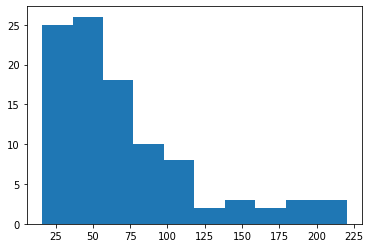

In [ ]:
# Mostramos el gráfico del precio
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [ ]:
# Dividimos los pisos dependiendo del precio: barato, asequible, y caro

y_class = []
for x in y_reg:
   # Barato
    if x <= 50:
        y_class.append(0)
    # Aseguible
    elif x <=150:
        y_class.append(1)
   # Caro
    else:
        y_class.append(2)

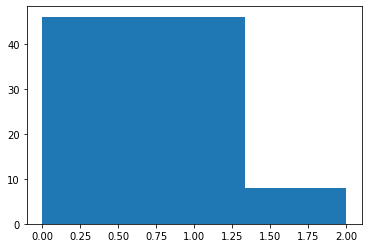

In [ ]:
# Mostramos el gráfico con las nuevas etiquetas de precios
plt.hist(y_class, bins=3)
plt.show()


##Regresión con dataset numérico

In [ ]:
columnas = ['Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews']
data_numerica = finalData.loc[:, columnas]
data_numerica.shape

(100, 8)

In [ ]:
data_numerica.head()

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,1.0,1.0,1.0,1,0,2,1125,80
1,1.0,1.0,1.0,1,0,3,1125,90
2,1.0,1.0,1.0,1,10,3,1125,20
3,1.0,1.0,2.0,2,5,3,1900,55
4,3.0,3.0,4.0,6,40,3,1125,46


In [ ]:
# Estandarizamos los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaler = scaler.fit_transform(data_numerica)

In [ ]:
data_numerica.iloc[:] = numerical_scaler
data_numerica.head(5)

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,-0.299892,0.456234,1.582729
1,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,0.094703,0.456234,1.870812
2,-0.530813,-0.267895,-0.602868,-0.589506,0.351521,0.094703,0.456234,-0.145770
3,-0.530813,-0.267895,-0.113655,0.252646,-0.244277,0.094703,2.295981,0.862521
4,3.291040,2.061627,0.864770,3.621253,3.926307,0.094703,0.456234,0.603246


In [ ]:
data_numerica.shape

(100, 8)

### Procesamiento de variables categóricas

In [ ]:
data_categorias = finalData[['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']]
data_categorias.head()

,Property Type,Room Type,Bed Type,Cancellation Policy
0,Apartment,Private room,Real Bed,flexible
1,Apartment,Entire home/apt,Real Bed,strict
2,Apartment,Private room,Real Bed,flexible
3,Apartment,Entire home/apt,Real Bed,strict
4,Apartment,Entire home/apt,Real Bed,moderate


In [ ]:
finalData["Property Type"].value_counts()

Apartment          85
House               6
Loft                2
Dorm                2
Hostel              1
Guesthouse          1
Bed & Breakfast     1
Condominium         1
Other               1
Name: Property Type, dtype: int64

In [ ]:
# Eliminamos una variable para evitar colinealidad
# Room Type
data_categorias_RT = pd.get_dummies(data_categorias['Room Type'], prefix='Room_Type')
data_categorias_RT.drop('Room_Type_Shared room', axis=1, inplace=True)

# Property Type
data_categorias_PT = pd.get_dummies(data_categorias['Property Type'], prefix='Property_Type')
data_categorias_PT.drop('Property_Type_House', axis=1, inplace=True)

# Cancellation Policy
data_categorias_CP = pd.get_dummies(data_categorias['Cancellation Policy'], prefix='Cancellation_Policy')
data_categorias_CP.drop('Cancellation_Policy_strict', axis=1, inplace=True)

# Juntamos los datos categóricos
data_categoria = pd.concat([data_categorias_PT, data_categorias_RT, data_categorias_CP], axis=1, join='inner')
data_categoria.shape

(100, 12)

###Juntamos los datos numéricos y categóricos

In [ ]:
data_categoria.head()

,Property_Type_Apartment,Property_Type_Bed & Breakfast,Property_Type_Condominium,Property_Type_Dorm,Property_Type_Guesthouse,Property_Type_Hostel,Property_Type_Loft,Property_Type_Other,Room_Type_Entire home/apt,Room_Type_Private room,Cancellation_Policy_flexible,Cancellation_Policy_moderate
0,1,0,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
data = pd.concat([data_numerica, data_categoria], axis=1, join='inner')
print(data.shape)

(100, 20)


In [ ]:
data.head()

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Property_Type_Apartment,Property_Type_Bed & Breakfast,Property_Type_Condominium,Property_Type_Dorm,Property_Type_Guesthouse,Property_Type_Hostel,Property_Type_Loft,Property_Type_Other,Room_Type_Entire home/apt,Room_Type_Private room,Cancellation_Policy_flexible,Cancellation_Policy_moderate
0,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,-0.299892,0.456234,1.582729,1,0,0,0,0,0,0,0,0,1,1,0
1,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,0.094703,0.456234,1.870812,1,0,0,0,0,0,0,0,1,0,0,0
2,-0.530813,-0.267895,-0.602868,-0.589506,0.351521,0.094703,0.456234,-0.145770,1,0,0,0,0,0,0,0,0,1,1,0
3,-0.530813,-0.267895,-0.113655,0.252646,-0.244277,0.094703,2.295981,0.862521,1,0,0,0,0,0,0,0,1,0,0,0
4,3.291040,2.061627,0.864770,3.621253,3.926307,0.094703,0.456234,0.603246,1,0,0,0,0,0,0,0,1,0,0,1


## Clasificación con el dataset numérico

In [ ]:
# Vamos a comprobar qué tamaño de datos tenemos y cual es su rango
data.shape

(100, 20)

In [ ]:
data.max(axis=0)

Bathrooms                        3.291040
Bedrooms                         3.226388
Beds                             6.735321
Guests Included                  3.621253
Extra People                     3.926307
Minimum Nights                   4.829840
Maximum Nights                   2.295981
Number of Reviews                4.780453
Property_Type_Apartment          1.000000
Property_Type_Bed & Breakfast    1.000000
Property_Type_Condominium        1.000000
Property_Type_Dorm               1.000000
Property_Type_Guesthouse         1.000000
Property_Type_Hostel             1.000000
Property_Type_Loft               1.000000
Property_Type_Other              1.000000
Room_Type_Entire home/apt        1.000000
Room_Type_Private room           1.000000
Cancellation_Policy_flexible     1.000000
Cancellation_Policy_moderate     1.000000
dtype: float64

In [ ]:
# Eliminamos los NaNs
data.isna().sum()

Bathrooms                        1
Bedrooms                         0
Beds                             1
Guests Included                  0
Extra People                     0
Minimum Nights                   0
Maximum Nights                   0
Number of Reviews                0
Property_Type_Apartment          0
Property_Type_Bed & Breakfast    0
Property_Type_Condominium        0
Property_Type_Dorm               0
Property_Type_Guesthouse         0
Property_Type_Hostel             0
Property_Type_Loft               0
Property_Type_Other              0
Room_Type_Entire home/apt        0
Room_Type_Private room           0
Cancellation_Policy_flexible     0
Cancellation_Policy_moderate     0
dtype: int64

In [ ]:
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].mean())
data['Beds'] = data['Beds'].fillna(data['Beds'].mean())

In [ ]:
data.isna().sum()

Bathrooms                        0
Bedrooms                         0
Beds                             0
Guests Included                  0
Extra People                     0
Minimum Nights                   0
Maximum Nights                   0
Number of Reviews                0
Property_Type_Apartment          0
Property_Type_Bed & Breakfast    0
Property_Type_Condominium        0
Property_Type_Dorm               0
Property_Type_Guesthouse         0
Property_Type_Hostel             0
Property_Type_Loft               0
Property_Type_Other              0
Room_Type_Entire home/apt        0
Room_Type_Private room           0
Cancellation_Policy_flexible     0
Cancellation_Policy_moderate     0
dtype: int64

In [ ]:
data.max(axis=0)

Bathrooms                        3.291040
Bedrooms                         3.226388
Beds                             6.735321
Guests Included                  3.621253
Extra People                     3.926307
Minimum Nights                   4.829840
Maximum Nights                   2.295981
Number of Reviews                4.780453
Property_Type_Apartment          1.000000
Property_Type_Bed & Breakfast    1.000000
Property_Type_Condominium        1.000000
Property_Type_Dorm               1.000000
Property_Type_Guesthouse         1.000000
Property_Type_Hostel             1.000000
Property_Type_Loft               1.000000
Property_Type_Other              1.000000
Room_Type_Entire home/apt        1.000000
Room_Type_Private room           1.000000
Cancellation_Policy_flexible     1.000000
Cancellation_Policy_moderate     1.000000
dtype: float64

In [ ]:
data.head()

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Property_Type_Apartment,Property_Type_Bed & Breakfast,Property_Type_Condominium,Property_Type_Dorm,Property_Type_Guesthouse,Property_Type_Hostel,Property_Type_Loft,Property_Type_Other,Room_Type_Entire home/apt,Room_Type_Private room,Cancellation_Policy_flexible,Cancellation_Policy_moderate
0,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,-0.299892,0.456234,1.582729,1,0,0,0,0,0,0,0,0,1,1,0
1,-0.530813,-0.267895,-0.602868,-0.589506,-0.840075,0.094703,0.456234,1.870812,1,0,0,0,0,0,0,0,1,0,0,0
2,-0.530813,-0.267895,-0.602868,-0.589506,0.351521,0.094703,0.456234,-0.145770,1,0,0,0,0,0,0,0,0,1,1,0
3,-0.530813,-0.267895,-0.113655,0.252646,-0.244277,0.094703,2.295981,0.862521,1,0,0,0,0,0,0,0,1,0,0,0
4,3.291040,2.061627,0.864770,3.621253,3.926307,0.094703,0.456234,0.603246,1,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)


In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
# transformamos las etiquetas a onehot
import tensorflow as tf
y_class_onehot = tf.keras.utils.to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # tenemos 3 clases

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 13s 55ms/step - loss: 1.2013 - accuracy: 0.1287 - val_loss: 1.0160 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 1.0364 - accuracy: 0.5646 - val_loss: 0.8815 - val_accuracy: 0.8750
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9385 - accuracy: 0.7384 - val_loss: 0.7742 - val_accuracy: 0.8750
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8776 - accuracy: 0.7627 - val_loss: 0.6818 - val_accuracy: 0.8750
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7720 - accuracy: 0.8169 - val_loss: 0.6090 - val_accuracy: 0.8750
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7400 - accuracy: 0.8265 - val_loss: 0.5728 - val_accuracy: 0.8750
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.7547 - val_loss: 0.5395 - val_accuracy: 0.8750
Epoch 8/50
9/9 [================

In [ ]:
# Vemos la precisiñon del modelo
loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

1/1 [==============================] - 0s 211ms/step - loss: 0.7952 - accuracy: 0.5500
Loss=0.795200765132904, Acc=0.550000011920929


## Regresión con el dataset numérico

In [ ]:
# Normalizamos datos y los precios de cada acomodación y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
print(y_reg_norm.min())
print(y_reg_norm.max())

0.0
1.0


In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 1s 25ms/step - loss: 0.1127 - val_loss: 0.0212
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0136
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0070
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0070
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0155
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0080
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0239 - val_loss: 0.0096
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0101
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0161
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0162
Epoch 11/50
9/9 [=====================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

1/1 [==============================] - 0s 174ms/step - loss: 0.0416
Loss=0.041612960398197174


In [ ]:
# Vamos a reescalar el modelo para ver que margen tenemos de error 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 33.30094056129455


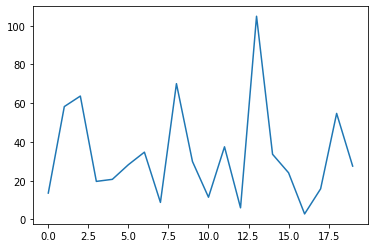

In [ ]:
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 69.00 Predicho: 55.40. Error: 13.60
Real: 120.00 Predicho: 178.26. Error: 58.26
Real: 38.00 Predicho: 101.69. Error: 63.69
Real: 85.00 Predicho: 104.63. Error: 19.63
Real: 51.00 Predicho: 71.69. Error: 20.69
Real: 55.00 Predicho: 83.25. Error: 28.25
Real: 43.00 Predicho: 8.28. Error: 34.72
Real: 83.00 Predicho: 91.78. Error: 8.78
Real: 34.00 Predicho: 104.10. Error: 70.10
Real: 36.00 Predicho: 65.90. Error: 29.90
Real: 63.00 Predicho: 51.55. Error: 11.45
Real: 165.00 Predicho: 202.49. Error: 37.49
Real: 75.00 Predicho: 80.99. Error: 5.99
Real: 72.00 Predicho: 176.91. Error: 104.91
Real: 40.00 Predicho: 73.63. Error: 33.63
Real: 190.00 Predicho: 165.94. Error: 24.06
Real: 20.00 Predicho: 17.17. Error: 2.83
Real: 25.00 Predicho: 40.79. Error: 15.79
Real: 45.00 Predicho: 99.73. Error: 54.73
Real: 50.00 Predicho: 77.52. Error: 27.52


In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 33.30094056129455
Error cuadrático medio: 1731.7652122150612


## Añadimos datos de imágenes

In [ ]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
# cuántas imágenes tenemos disponibles?
images.shape

(100, 224, 224, 3)

In [ ]:
from tqdm import tqdm
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]

100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


In [ ]:
images_feat.shape

(100, 512)

In [ ]:
data.shape

(100, 20)

In [ ]:
# Juntamos las features de las imágenes y el dataset numérico/categórico
data_all = np.concatenate((data, images_feat), axis=1)
print(data_all.shape)

(100, 532)


## Clasificación con solo imágenes

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)

In [ ]:
# convertimos las etiquetas a onehot
y_class_onehot = tf.keras.utils.to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 31ms/step - loss: 1.0389 - accuracy: 0.4490 - val_loss: 0.9316 - val_accuracy: 0.3750
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.8986 - accuracy: 0.4001 - val_loss: 0.7815 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8067 - accuracy: 0.5965 - val_loss: 0.7932 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.7358 - val_loss: 0.7711 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.8562 - val_loss: 0.6844 - val_accuracy: 0.7500
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.9038 - val_loss: 0.7644 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8987 - val_loss: 0.6850 - val_accuracy: 0.6250
Epoch 8/50
9/9 [=================

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 34ms/step - loss: 1.1101 - accuracy: 0.4054 - val_loss: 0.9187 - val_accuracy: 0.6250
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9707 - accuracy: 0.5177 - val_loss: 0.8681 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8766 - accuracy: 0.5612 - val_loss: 0.8516 - val_accuracy: 0.2500
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8795 - accuracy: 0.6178 - val_loss: 0.8177 - val_accuracy: 0.3750
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7956 - accuracy: 0.6896 - val_loss: 0.7785 - val_accuracy: 0.3750
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7555 - accuracy: 0.6920 - val_loss: 0.7814 - val_accuracy: 0.3750
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.7151 - val_loss: 0.7230 - val_accuracy: 0.6250
Epoch 8/50
9/9 [=================

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=200,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/200
9/9 [==============================] - 1s 36ms/step - loss: 8.4346 - accuracy: 0.4314 - val_loss: 7.7929 - val_accuracy: 0.6250
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 7.7640 - accuracy: 0.4302 - val_loss: 7.2592 - val_accuracy: 0.7500
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 7.2266 - accuracy: 0.4764 - val_loss: 6.7709 - val_accuracy: 0.3750
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 6.6023 - accuracy: 0.7209 - val_loss: 6.1921 - val_accuracy: 0.3750
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 6.1214 - accuracy: 0.5364 - val_loss: 5.7374 - val_accuracy: 0.5000
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 5.6481 - accuracy: 0.6409 - val_loss: 5.3274 - val_accuracy: 0.5000
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 5.1792 - accuracy: 0.7124 - val_loss: 4.8426 - val_accuracy: 0.3750
Epoch 8/200
9/9 [=========

## Regresión con solo imágenes

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

Epoch 1/50
9/9 [==============================] - 1s 23ms/step - loss: 0.1955 - val_loss: 0.0951
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.1182
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.0873
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0859
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0594
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0743
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0560
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0951
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0859
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0607
Epoch 11/50
9/9 [=====================

## Clasificación con todos los datos (numéricos + imágenes)

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# convertimos las etiquetas a onehot
y_class_onehot = tf.keras.utils.to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 33ms/step - loss: 1.0816 - accuracy: 0.3489 - val_loss: 0.9599 - val_accuracy: 0.3750
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9385 - accuracy: 0.5033 - val_loss: 0.9090 - val_accuracy: 0.3750
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8663 - accuracy: 0.5077 - val_loss: 0.8647 - val_accuracy: 0.3750
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7949 - accuracy: 0.6762 - val_loss: 0.8745 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.6689 - val_loss: 0.7973 - val_accuracy: 0.5000
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.7681 - val_loss: 0.7732 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.7649 - val_loss: 0.8580 - val_accuracy: 0.5000
Epoch 8/50
9/9 [=================

## Regresión con todos los datos (numéricos + imágenes)



In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: 0.1792 - val_loss: 0.0593
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0548 - val_loss: 0.0438
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0572
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0364
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0337
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0543
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0355
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0303
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0325
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0268
Epoch 11/50
9/9 [=====================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

1/1 [==============================] - 0s 173ms/step - loss: 0.0341
Loss=0.03406655415892601


In [ ]:
# Vamos a reescalar las predicciones para ver el error real 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 29.772702789306642


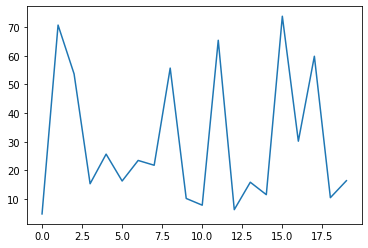

In [ ]:
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')
# Podemos ver que el margen de error es inferior al de los modelos anteriores

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 69.00 Predicho: 64.15. Error: 4.85
Real: 120.00 Predicho: 49.34. Error: 70.66
Real: 38.00 Predicho: 91.65. Error: 53.65
Real: 85.00 Predicho: 69.63. Error: 15.37
Real: 51.00 Predicho: 76.68. Error: 25.68
Real: 55.00 Predicho: 71.32. Error: 16.32
Real: 43.00 Predicho: 66.48. Error: 23.48
Real: 83.00 Predicho: 104.81. Error: 21.81
Real: 34.00 Predicho: 89.67. Error: 55.67
Real: 36.00 Predicho: 46.24. Error: 10.24
Real: 63.00 Predicho: 70.89. Error: 7.89
Real: 165.00 Predicho: 99.63. Error: 65.37
Real: 75.00 Predicho: 68.66. Error: 6.34
Real: 72.00 Predicho: 87.89. Error: 15.89
Real: 40.00 Predicho: 51.56. Error: 11.56
Real: 190.00 Predicho: 116.26. Error: 73.74
Real: 20.00 Predicho: 50.20. Error: 30.20
Real: 25.00 Predicho: 84.80. Error: 59.80
Real: 45.00 Predicho: 55.52. Error: 10.52
Real: 50.00 Predicho: 66.43. Error: 16.43


In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 29.772702789306642
Error cuadrático medio: 1417.713831991954
